## Import Necesssary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Datasets

In [4]:
cocacola_data=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola_data.tail()

,Quarter,Sales
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0
40,Q1_96,4194.0
41,Q2_96,5253.0


## Data Understanding

In [5]:
cocacola_data.shape

(42, 2)

In [6]:
cocacola_data.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [7]:
cocacola_data.dtypes

Quarter     object
Sales      float64
dtype: object

### Inference :
* The data have 2 features and 42 records

* The datatype of the features are assigned coorectly and there is no null values

## Data Visualization

<AxesSubplot:>

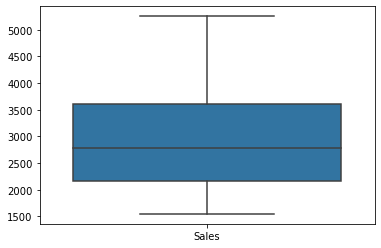

In [11]:
sns.boxplot(data=cocacola_data)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

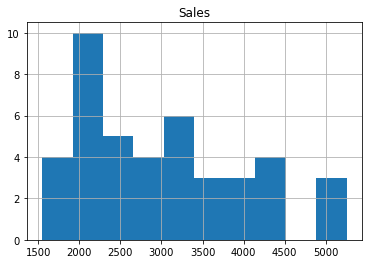

In [12]:
cocacola_data.hist()

<AxesSubplot:ylabel='Density'>

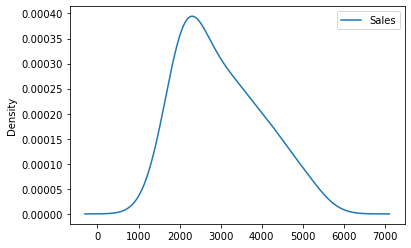

In [13]:
cocacola_data.plot(kind='kde')

C:\Users\sangeethraj K\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

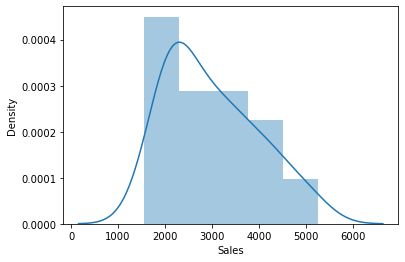

In [14]:
sns.distplot(cocacola_data['Sales'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

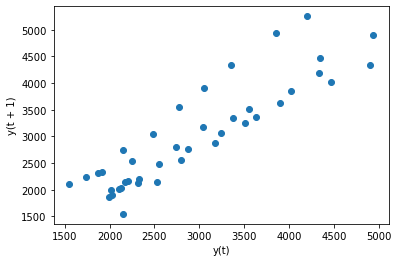

In [15]:
from pandas.plotting import lag_plot

lag_plot(cocacola_data['Sales'])

In [16]:
from pandas import DataFrame
from numpy import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Model based forecasting

In [17]:
cocacola_data_model=cocacola_data

In [18]:
cocacola_data['quater_list']=cocacola_data_model['Quarter']

In [19]:
cocacola_data_model['quater_list']=0
for i in range(len(cocacola_data_model)):
    p=cocacola_data_model['Quarter'][i]
    cocacola_data_model['quater_list'][i]=p[1:2]

In [20]:
cocacola_data_model['year_list']=0
for i in range(len(cocacola_data_model)):
    p=cocacola_data_model['Quarter'][i]
    cocacola_data_model['year_list'][i]=p[3:5]

In [21]:
cocacola_data_model.head()

,Quarter,Sales,quater_list,year_list
0,Q1_86,1734.827000,1,86
1,Q2_86,2244.960999,2,86
2,Q3_86,2533.804993,3,86
3,Q4_86,2154.962997,4,86
4,Q1_87,1547.818996,1,87


In [22]:
df_dummies = pd.DataFrame(pd.get_dummies(cocacola_data_model['quater_list']))

In [23]:
cococola_data_df =pd.concat([cocacola_data_model,df_dummies],axis= 1)
cococola_data_df.head()

,Quarter,Sales,quater_list,year_list,1,2,3,4
0,Q1_86,1734.827000,1,86,1,0,0,0
1,Q2_86,2244.960999,2,86,0,1,0,0
2,Q3_86,2533.804993,3,86,0,0,1,0
3,Q4_86,2154.962997,4,86,0,0,0,1
4,Q1_87,1547.818996,1,87,1,0,0,0


In [24]:
cococola_data_df['quater_sqaure']=cococola_data_df['quater_list'].apply(lambda x:x**2)

In [25]:
from numpy import log

cococola_data_df['log_sales']=cococola_data_df['Sales'].apply(lambda x:log(x))

In [26]:
cococola_data_df.head()

,Quarter,Sales,quater_list,year_list,1,2,3,4,quater_sqaure,log_sales
0,Q1_86,1734.827000,1,86,1,0,0,0,1,7.458663
1,Q2_86,2244.960999,2,86,0,1,0,0,4,7.716443
2,Q3_86,2533.804993,3,86,0,0,1,0,9,7.837477
3,Q4_86,2154.962997,4,86,0,0,0,1,16,7.675529
4,Q1_87,1547.818996,1,87,1,0,0,0,1,7.344602


In [27]:
cococola_data_df=cococola_data_df.rename(columns={1:'Q1',2:'Q2',3:'Q3',4:'Q4'})
cococola_data_df.head()

,Quarter,Sales,quater_list,year_list,Q1,Q2,Q3,Q4,quater_sqaure,log_sales
0,Q1_86,1734.827000,1,86,1,0,0,0,1,7.458663
1,Q2_86,2244.960999,2,86,0,1,0,0,4,7.716443
2,Q3_86,2533.804993,3,86,0,0,1,0,9,7.837477
3,Q4_86,2154.962997,4,86,0,0,0,1,16,7.675529
4,Q1_87,1547.818996,1,87,1,0,0,0,1,7.344602


<AxesSubplot:>

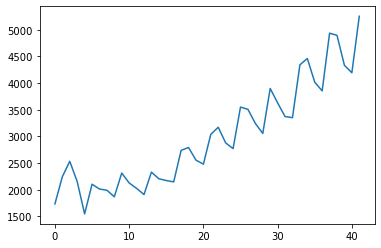

In [28]:
cococola_data_df['Sales'].plot()

In [29]:
cococola_data_df.shape

(42, 10)

In [30]:
train_model=cococola_data_df.head(30)
test_model=cococola_data_df.tail(12)

### Linear model

In [31]:
import statsmodels.formula.api as smf 
from sklearn.metrics import mean_absolute_percentage_error

linear_model = smf.ols('Sales~quater_list',data=train_model).fit()
linear_pred=linear_model.predict(test_model['quater_list'])

linear_rms=mean_absolute_percentage_error(test_model['Sales'],linear_pred)*100
linear_rms

39.38337385344015

### Exponential model

In [32]:
exponential_model = smf.ols('log_sales~quater_list',data=train_model).fit()
exponential_pred=exponential_model.predict(test_model['quater_list'])

exp_rms=mean_absolute_percentage_error(test_model['Sales'],exponential_pred)*100
exp_rms

99.81145421571463

### Quaratic model

In [33]:
quaratic_model = smf.ols('Sales~quater_list+quater_sqaure',data=train_model).fit()
#quaratic_model.fit()
quaratic_pred=quaratic_model.predict(test_model[['quater_list','quater_sqaure']])

qua_rms=mean_absolute_percentage_error(test_model['Sales'],quaratic_pred)*100
qua_rms

39.79929382038359

### Additional seasonality model

In [34]:
add_sea = smf.ols("Sales~Q1+Q2+Q3+Q4",data=train_model).fit()
add_pred=add_sea.predict(test_model[['Q1','Q2','Q3','Q4']])

add_rms=mean_absolute_percentage_error(test_model['Sales'],add_pred)*100
add_rms

39.92419347551277

### Additional seasonality with quaratic model

In [35]:
add_qua_model=smf.ols("Sales~quater_list+quater_sqaure+Q1+Q2+Q3+Q4",data=train_model).fit()
add_qua_pred=add_qua_model.predict(test_model[['quater_list','quater_sqaure','Q1','Q2','Q3','Q4']])

add_qua_rms=mean_absolute_percentage_error(test_model['Sales'],add_qua_pred)*100
add_qua_rms

39.92419347551284

### Multiplicative seasonality model

In [36]:
mul_sea = smf.ols("log_sales~Q1+Q2+Q3+Q4",data=train_model).fit()
mul_pred=mul_sea.predict(test_model[['Q1','Q2','Q3','Q4']])

mul_rms=mean_absolute_percentage_error(test_model['Sales'],mul_pred)*100
mul_rms

99.81166869304352

### Multiplicative with additional seasonality

In [37]:
mul_add_model=smf.ols("Sales~quater_list+Q1+Q2+Q3+Q4",data=train_model).fit()
mul_add_pred=mul_add_model.predict(test_model[['quater_list','Q1','Q2','Q3','Q4']])

mul_add_rms=mean_absolute_percentage_error(test_model['Sales'],mul_add_pred)*100
mul_add_rms

39.924193475512794

## Data driven model

In [40]:
train_data=cocacola_data.head(30)
test_data=cocacola_data.tail(12)

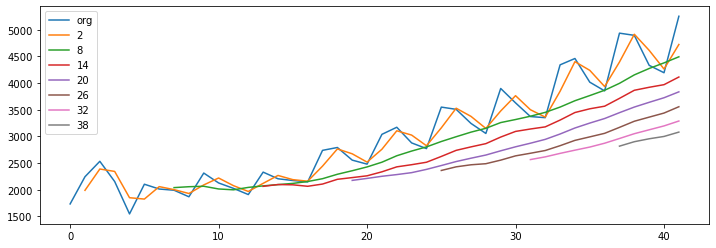

In [41]:
plt.figure(figsize=(12,4))
cocacola_data['Sales'].plot(label="org")
for i in range(2,43,6):
    cocacola_data['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

### Time series decomposition plot

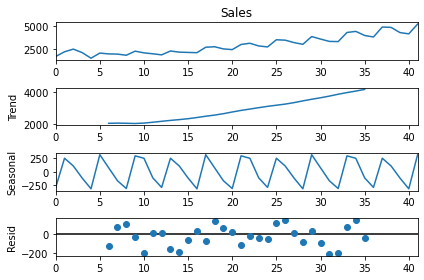

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(cocacola_data['Sales'],period=12)
decompose_ts_add.plot()
plt.show()

### ACF Plot and PACF Plot

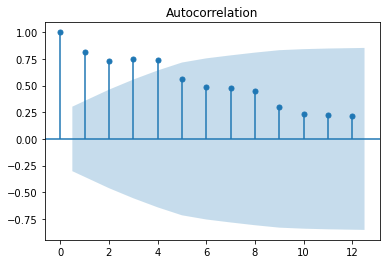

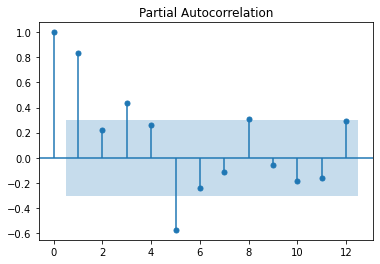

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola_data['Sales'],lags=12)
tsa_plots.plot_pacf(cocacola_data['Sales'],lags=12)
plt.show()

In [44]:
train_data=cocacola_data.head(30)
test_data=cocacola_data.tail(12)

### Simple Exponential Smoothing model

In [45]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

ses_model = SimpleExpSmoothing(train_data["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])

ses_rms=mean_absolute_percentage_error(pred_ses,test_data['Sales'])*100 
ses_rms

30.811042718523822

### Holt model

In [46]:
from statsmodels.tsa.holtwinters import Holt

hw_model = Holt(train_data["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test_data.index[0],end = test_data.index[-1])
hw_rms=mean_absolute_percentage_error(pred_hw,test_data['Sales'])*100 
hw_rms

9.47443889667805

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

hwe_model_mul_add = ExponentialSmoothing(train_data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])

hw_ma_rms=mean_absolute_percentage_error(pred_hwe_mul_add,test_data['Sales'])*100 
hw_ma_rms

4.949648399363347

### Holts winter exponential smoothing with additive seasonality and additive trend

In [48]:
hwe_model_add_add = ExponentialSmoothing(train_data["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])

hw_aa_rms=mean_absolute_percentage_error(pred_hwe_add_add,test_data['Sales'])*100 
hw_aa_rms

8.56969830329017

### ARMA Model

In [49]:
from statsmodels.tsa.arima_model import ARMA

ARMAmodel = ARMA(train_data['Sales'], order=(1, 1)) #model with AR=0 and MA=1
ARMAmodel_fit = ARMAmodel.fit()

ARMA_pred = ARMAmodel_fit.predict(0,11)
ARMA_pred

arma_rms=mean_absolute_percentage_error(ARMA_pred,test_data['Sales'])*100 
arma_rms

99.34039745320806

### ARIMA Model

In [50]:
from statsmodels.tsa.arima_model import ARIMA

ARIMAmodel = ARIMA(train_data['Sales'], order=(1, 1, 2)) #notice p,d and q value here
ARIMA_model_fit = ARIMAmodel.fit()

ARIMA_pred = ARIMA_model_fit.predict(1,12,typ='levels')

arima_rms=mean_absolute_percentage_error(ARIMA_pred,test_data['Sales'])*100
arima_rms

95.05936824165686

### Converting non stationary data to stationary data to improve ARIMA model

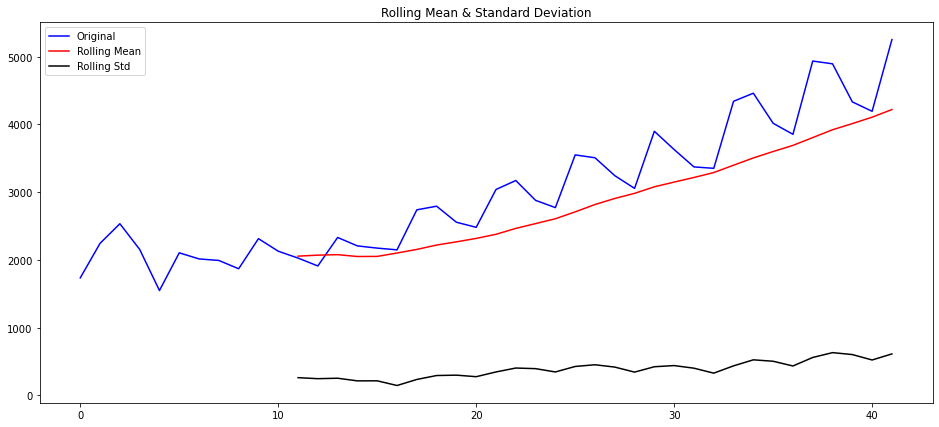

In [52]:
rolLmean = cocacola_data['Sales'].rolling(12).mean() # 12 entries
rolLstd = cocacola_data['Sales'].rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(cocacola_data['Sales'], color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

##### Log transform 

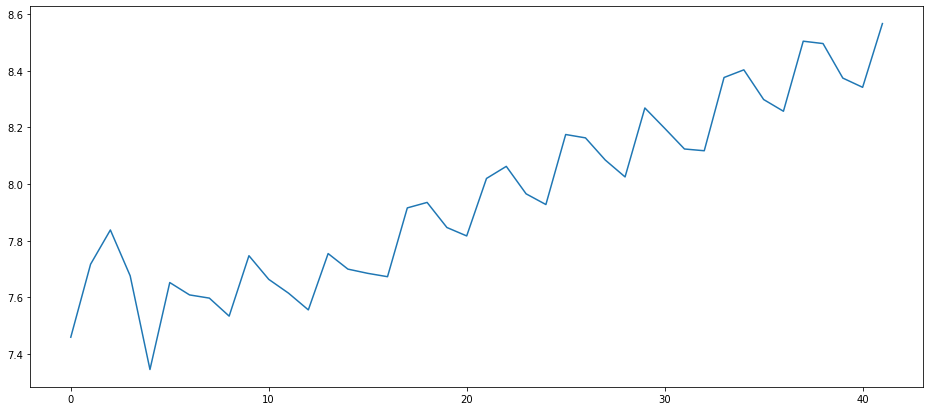

In [53]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(cocacola_data['Sales'])#to transform to stationary from non-stationary
plt.plot(ts_log)

##### Differencing 

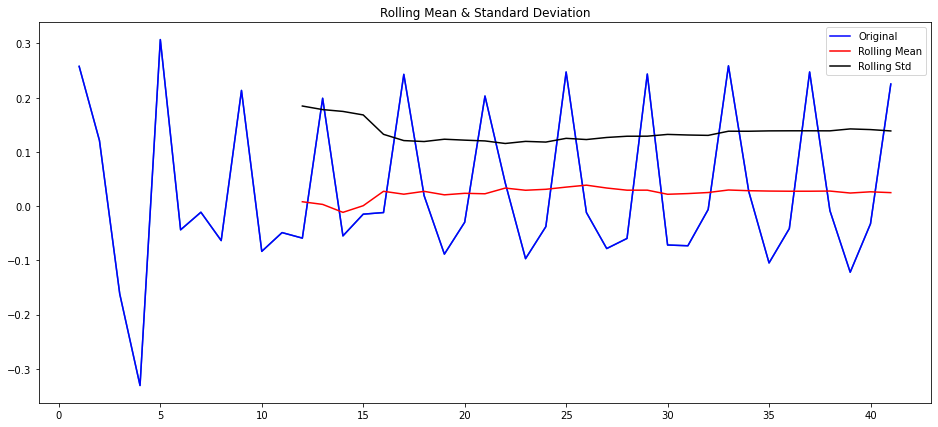

In [54]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift() # I will shift the time series by 1 and subtract from the original TS.
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

##### ACF and PACF plot

In [55]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12)

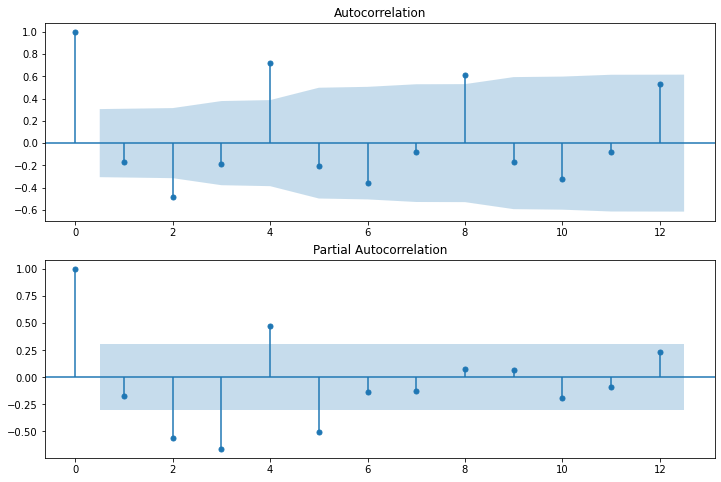

In [56]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=12,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=12,ax=ax2)

In [57]:
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

C:\Users\sangeethraj K\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\sangeethraj K\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


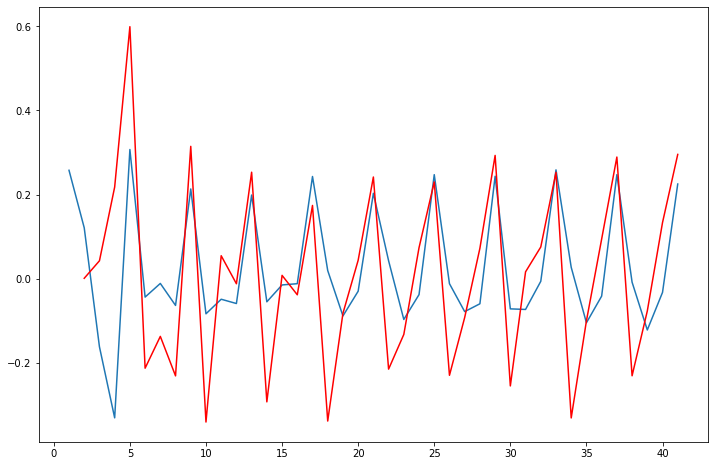

In [58]:
plt.figure(figsize=(12,8))
ts_log_diff.dropna(inplace=True)
model = ARIMA(ts_log_diff, order=(4,1,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

### List of models based of RMSE value

In [59]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea",'rmse_ses','rmse_holt','rmse_holt_ma','rmse_holt_aa','rmse_arma','rmse_arima']),
        "RMSE_Values":pd.Series([linear_rms,exp_rms,qua_rms,add_rms,add_qua_rms,mul_rms,mul_add_rms,ses_rms,hw_rms,hw_ma_rms,hw_aa_rms,arma_rms,arima_rms])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
9,rmse_holt_ma,4.949648
10,rmse_holt_aa,8.569698
8,rmse_holt,9.474439
7,rmse_ses,30.811043
0,rmse_linear,39.383374
2,rmse_Quad,39.799294
3,rmse_add_sea,39.924193
6,rmse_Mult_add_sea,39.924193
4,rmse_add_sea_quad,39.924193
12,rmse_arima,95.059368


### Inference:

* The mean absolute percentage error of Holts winter exponential smoothing with multiplicative seasonality and additive trend model is comparitively low compared to all other model

* Hence, the forecast model can be built by Holts winter exponential smoothing with multiplicative seasonality and additive trend